In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [16]:
df_train = pd.read_csv("C:/Users/Poltatil/Repo_thebridge/2506_dsft_thebridge/3-Machine_Learning/Proyecto_KG_damelapasta/train.csv")


In [18]:
df_train.head()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,9580,0.668999,58,2,0.449504,3425.0,9,1,1,1,1.0,0
1,39755,0.015922,71,0,6.000000,NaN,5,0,0,0,0.0,0
2,118799,0.183062,52,1,0.035593,5000.0,9,0,0,0,0.0,0
3,16489,0.162301,77,0,0.227886,2000.0,8,0,0,0,0.0,0
4,149857,0.404199,30,0,0.026010,5843.0,4,0,0,0,0.0,0


In [19]:
df_train.columns

Index(['ID', 'RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs'],
      dtype='object')

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    105000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 2   Age                                   105000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 4   DebtRatio                             105000 non-null  float64
 5   MonthlyIncome                         84164 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 7   NumberOfTimes90DaysLate               105000 non-null  int64  
 8   NumberRealEstateLoansOrLines          105000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64  
 10  NumberOfDependents                    102236 non-null  float64
 11  

In [21]:
df_train.describe()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,8.416400e+04,105000.000000,105000.000000,105000.000000,105000.000000,102236.000000,105000.000000
mean,75006.458152,5.378324,52.325610,0.409352,352.044192,6.703641e+03,8.459952,0.254619,1.019010,0.228762,0.757933,0.066514
std,43315.742022,201.573457,14.766425,4.056717,1820.229318,1.622288e+04,5.134329,4.032506,1.131065,4.017864,1.115273,0.249180
min,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37590.750000,0.029974,41.000000,0.000000,0.174950,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74941.500000,0.154252,52.000000,0.000000,0.366061,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,112542.500000,0.556035,63.000000,0.000000,0.870083,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,149999.000000,29110.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


In [22]:
df_train.isnull().sum()


ID                                          0
RevolvingUtilizationOfUnsecuredLines        0
Age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20836
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2764
SeriousDlqin2yrs                            0
dtype: int64

In [31]:
df_train['MonthlyIncome'].fillna(df_train['MonthlyIncome'].median(), inplace=True)
df_train['NumberOfDependents'].fillna(0, inplace=True)

C:\Users\Poltatil\AppData\Local\Temp\ipykernel_17844\3106773618.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['MonthlyIncome'].fillna(df_train['MonthlyIncome'].median(), inplace=True)
C:\Users\Poltatil\AppData\Local\Temp\ipykernel_17844\3106773618.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [32]:
df_train['SeriousDlqin2yrs'].value_counts(normalize=True)


SeriousDlqin2yrs
0    0.933486
1    0.066514
Name: proportion, dtype: float64

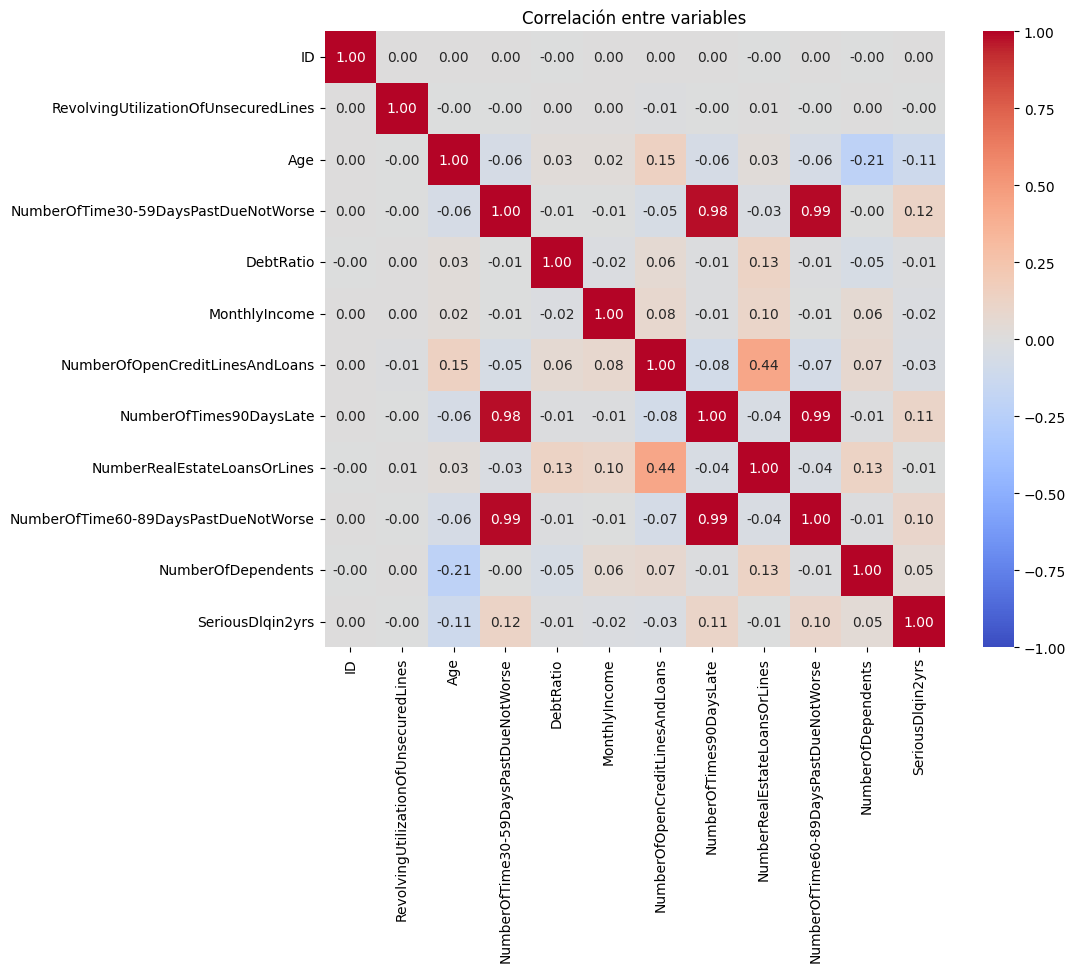

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmax = 1, vmin = -1)
plt.title('Correlación entre variables')
plt.show()

In [34]:
df_train.corr()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
ID,1.000000,0.000154,0.002974,0.002196,-0.003007,0.002380,0.002774,0.001033,-0.001972,0.001497,-0.000242,0.001857
RevolvingUtilizationOfUnsecuredLines,0.000154,1.000000,-0.004256,-0.001181,0.003941,0.004230,-0.013877,-0.001193,0.007394,-0.001104,0.000685,-0.001685
Age,0.002974,-0.004256,1.000000,-0.062235,0.025206,0.023440,0.145692,-0.060004,0.029178,-0.056341,-0.213789,-0.114572
NumberOfTime30-59DaysPastDueNotWorse,0.002196,-0.001181,-0.062235,1.000000,-0.007335,-0.006633,-0.052518,0.982646,-0.028891,0.986302,-0.002165,0.124291
DebtRatio,-0.003007,0.003941,0.025206,-0.007335,1.000000,-0.018294,0.055192,-0.009186,0.130042,-0.008252,-0.050302,-0.008401
MonthlyIncome,0.002380,0.004230,0.023440,-0.006633,-0.018294,1.000000,0.079367,-0.008755,0.102765,-0.007592,0.061606,-0.016486
NumberOfOpenCreditLinesAndLoans,0.002774,-0.013877,0.145692,-0.052518,0.055192,0.079367,1.000000,-0.078131,0.435138,-0.069019,0.073705,-0.028543
NumberOfTimes90DaysLate,0.001033,-0.001193,-0.060004,0.982646,-0.009186,-0.008755,-0.078131,1.000000,-0.044308,0.992445,-0.009648,0.114855
NumberRealEstateLoansOrLines,-0.001972,0.007394,0.029178,-0.028891,0.130042,0.102765,0.435138,-0.044308,1.000000,-0.038554,0.131944,-0.006987
NumberOfTime60-89DaysPastDueNotWorse,0.001497,-0.001104,-0.056341,0.986302,-0.008252,-0.007592,-0.069019,0.992445,-0.038554,1.000000,-0.010476,0.100458


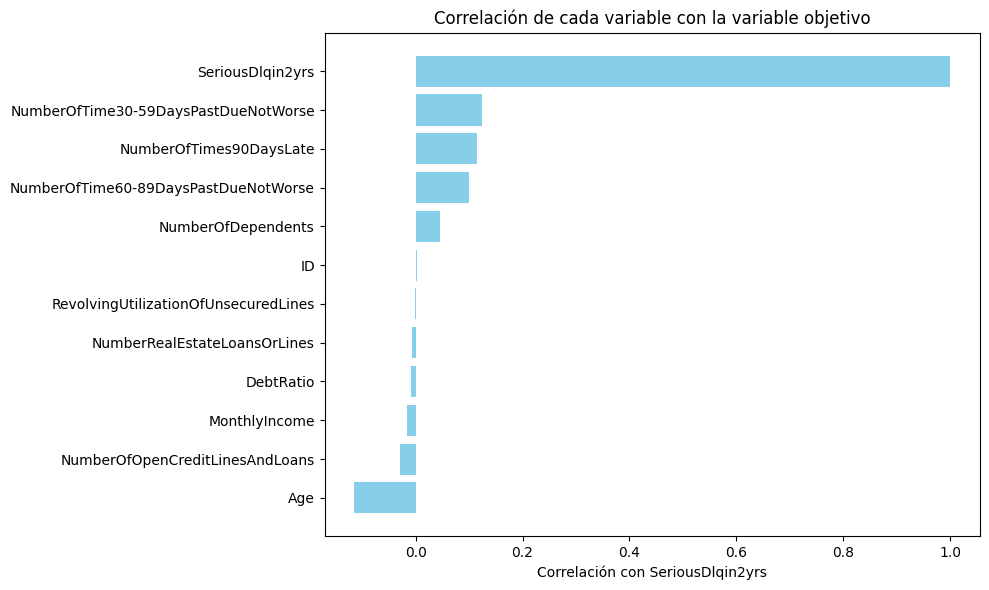

In [ ]:
correlation = df_train.corr(numeric_only=True)['SeriousDlqin2yrs'].sort_values(ascending=False)

# Lo convierte en DataFrame para graficar mejor
correlation_df = correlation.reset_index()
correlation_df.columns = ['Feature', 'Correlation']

# Visualización
plt.figure(figsize=(10, 6))
plt.barh(correlation_df['Feature'], correlation_df['Correlation'], color='skyblue')
plt.xlabel('Correlación con SeriousDlqin2yrs')
plt.title('Correlación de cada variable con la variable objetivo')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

In [ ]:
X = df_train.drop(columns=['SeriousDlqin2yrs', 'ID'])  
y = df_train['SeriousDlqin2yrs']  

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("MAE - Logistic Regression:", mean_absolute_error(y_test, y_pred_lr))
print("AUC - Logistic Regression:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1]))

MAE - Logistic Regression: 0.06614285714285714
AUC - Logistic Regression: 0.6964155815777836


In [40]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("MAE - Árbol de decisión:", mean_absolute_error(y_test, y_pred_tree))
print("AUC - Árbol de decisión:", roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]))

MAE - Árbol de decisión: 0.10028571428571428
AUC - Árbol de decisión: 0.6039612324688006


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("MAE - Random Forest:", mean_absolute_error(y_test, y_pred_rf))
print("AUC - Random Forest:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


MAE - Random Forest: 0.06523809523809523
AUC - Random Forest: 0.8316798544158087


In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("MAE - Gradient Boosting:", mean_absolute_error(y_test, y_pred_gb))
print("AUC - Gradient Boosting:", roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]))

MAE - Gradient Boosting: 0.06247619047619048
AUC - Gradient Boosting: 0.860443475136068


In [43]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("MAE - XGBoost:", mean_absolute_error(y_test, y_pred_xgb))
print("AUC - XGBoost:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))

c:\Users\Poltatil\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [20:21:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


MAE - XGBoost: 0.0640952380952381
AUC - XGBoost: 0.8450449365502942


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(random_state=42))
])

In [45]:
pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('gb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0


In [46]:

y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # para AUC
y_pred = pipeline.predict(X_test)  # para MAE

auc = roc_auc_score(y_test, y_pred_proba)
mae = mean_absolute_error(y_test, y_pred)

print(f"AUC: {auc:.4f}")
print(f"MAE: {mae:.4f}")

AUC: 0.8602
MAE: 0.0627


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'gb__n_estimators': [100, 200],
    'gb__max_depth': [3, 5, 7],
    'gb__learning_rate': [0.05, 0.1, 0.2]
}

# GridSearchCV con validación cruzada y AUC
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)


In [48]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'gb__learning_rate': [0.05, 0.1, ...], 'gb__max_depth': [3, 5, ...], 'gb__n_estimators': [100, 200]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [49]:
best_model = grid_search.best_estimator_


In [50]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

In [51]:
from sklearn.metrics import roc_auc_score, mean_absolute_error

auc = roc_auc_score(y_test, y_pred_proba)
mae = mean_absolute_error(y_test, y_pred)

print("Mejores hiperparámetros:", grid_search.best_params_)
print(f"AUC (mejor modelo): {auc:.4f}")
print(f"MAE (mejor modelo): {mae:.4f}")

Mejores hiperparámetros: {'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__n_estimators': 200}
AUC (mejor modelo): 0.8601
MAE (mejor modelo): 0.0627


***PREPARACIÓN TEST***

In [52]:
df_test = pd.read_csv("C:/Users/Poltatil/Repo_thebridge/2506_dsft_thebridge/3-Machine_Learning/Proyecto_KG_damelapasta/test.csv")


In [53]:
df_test['MonthlyIncome'].fillna(df_train['MonthlyIncome'].median(), inplace=True)
df_test['NumberOfDependents'].fillna(0, inplace=True)

C:\Users\Poltatil\AppData\Local\Temp\ipykernel_17844\3452947286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['MonthlyIncome'].fillna(df_train['MonthlyIncome'].median(), inplace=True)
C:\Users\Poltatil\AppData\Local\Temp\ipykernel_17844\3452947286.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [ ]:
X_test_final = df_test.drop(columns=["ID"])


In [ ]:
y_pred_proba = best_model.predict_proba(X_test_final)[:, 1]


In [57]:
submission = pd.DataFrame({
    "ID": df_test["ID"],
    "SeriousDlqin2yrs": y_pred_proba
})

submission.to_csv("submission.csv", index=False)

In [58]:
submission.head()

,ID,SeriousDlqin2yrs
0,129460,0.050769
1,134018,0.011081
2,86523,0.013681
3,138466,0.008597
4,143905,0.007689
